# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 1. While correlation is 0.84, it is approaching to a perfect correlation, which means as average tumor volume increases and weight increases.
 2. In treatments ("Capomulin", "Ramicane", "Infubinol", "Ceftamin"), only "infubinol"has outliers.
 3. According to the summary statistc, mean and median tumor volume for each regimen are very close to each other.

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df=pd.merge(mouse_metadata,study_results, how='right', on = "Mouse ID" )
# Display the data table for preview
merge_df.head()
# merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [98]:
# Checking the number of mice.
num_mice=merge_df["Mouse ID"].nunique()
num_mice


249

In [99]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ID=merge_df.loc[merge_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [100]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df=merge_df.loc[merge_df["Mouse ID"]=="g989",:]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [101]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df[merge_df["Mouse ID"].isin(duplicate_mouse_ID)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [102]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
standard_deviation=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

Summary_Statistical=pd.DataFrame({"Mean of Tumor Volume":mean,
                                  "Median of Tumor Volume":median,
                                  "Variance of Tumor Volume":variance,
                                  "Standard Deviation of Tumor Volume":standard_deviation,
                                  "SEM of Tumor Volume":sem
                                   })
Summary_Statistical

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
aggregation_summary=clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
aggregation_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

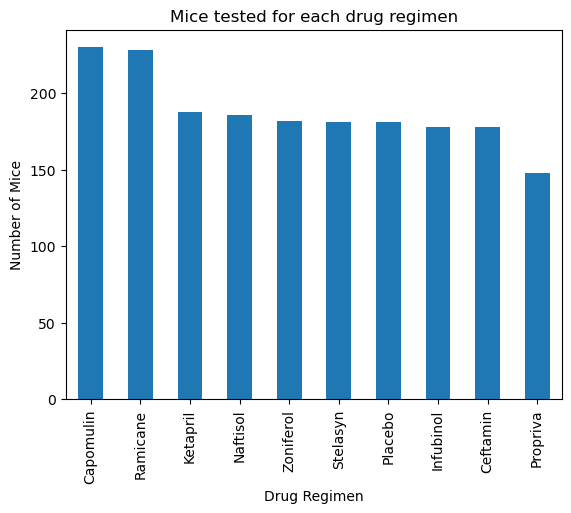

In [105]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_total=clean_df["Drug Regimen"].value_counts()
timepoint_total
type(timepoint_total)
timepoint_total.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Mice tested for each drug regimen")
plt.show()









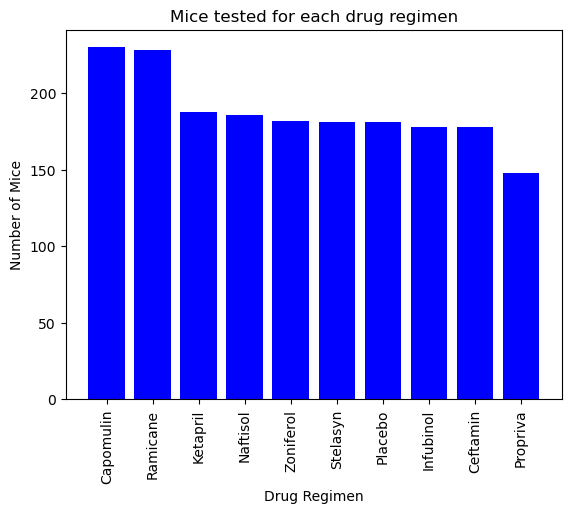

In [106]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis=timepoint_total.index.values
y_axis=timepoint_total.values

plt.bar(x_axis, y_axis, color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Mice tested for each drug regimen")
plt.xticks(rotation="vertical")
plt.show()


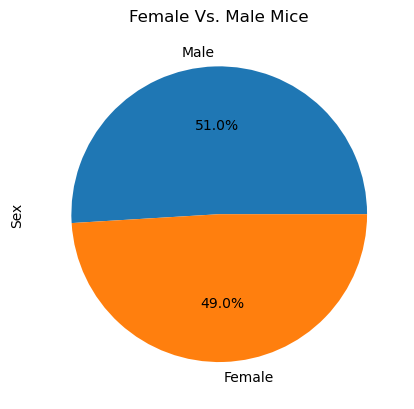

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender= clean_df["Sex"].value_counts()
plt.title("Female Vs. Male Mice")
gender.plot.pie(autopct="%1.1f%%")
plt.show()


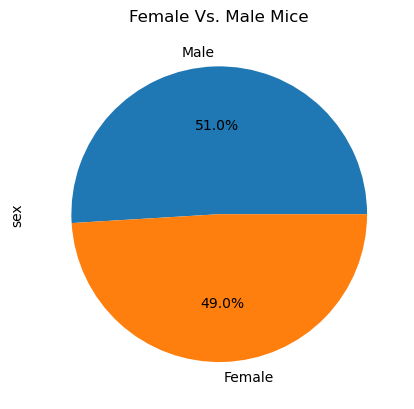

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
lables=["Female","male"]
plot=gender.plot.pie(y="Total Count",autopct="%1.1f%%")
plt.title("Female Vs. Male Mice")
plt.ylabel("sex")
plt.show()




## Quartiles, Outliers and Boxplots

In [109]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoint=clean_df.groupby(clean_df['Mouse ID'])['Timepoint'].max()

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


last_timepoint_df=last_timepoint
tumor_volume_df=pd.merge(last_timepoint_df,clean_df,on=["Mouse ID","Timepoint"])
tumor_volume_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [110]:
# Put treatments into a list for for-loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_cap=[]
tumor_vol_ram=[]
tumor_vol_inf=[]
tumor_vol_cef=[]


outlier_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in range(len(tumor_volume_df)-1):
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 

    if tumor_volume_df.loc[i, "Drug Regimen"] =="Capomulin":
        tumor_vol_cap.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] =="Ramicane":
        tumor_vol_ram.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] =="Infubinol":
        tumor_vol_inf.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] =="Ceftamin":
        tumor_vol_cef.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])

tumor_vol=[tumor_vol_cap,
tumor_vol_ram,
tumor_vol_inf,
tumor_vol_cef]

for i in range(len(tumor_vol)):
    # Determine outliers using upper and lower bounds

    quartiles = pd.Series(tumor_vol[i]).quantile([.25,.5,.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    print(f"Treatment: {treatments[i]}")
    print(f"lower quartile: {lower_q} upper quartile: {upper_q}  range: {iqr}")


    lower_bound = lower_q - 1.5*iqr
    upper_bound = upper_q + 1.5*iqr
    print(f"lower bound: {lower_bound} upper bound: {upper_bound}")

    for j in range (len(tumor_vol[i])):
        if (tumor_vol[i][j]<lower_bound) or (tumor_vol[i][j]>upper_bound):
            outlier=tumor_vol[i][j]
            outlier_list.append(outlier)
            print(f"The outliers are {outlier_list}.")

    print("------------")
    
    


    

Treatment: Capomulin
lower quartile: 32.37735684 upper quartile: 40.1592203  range: 7.781863460000004
lower bound: 20.70456164999999 upper bound: 51.83201549
------------
Treatment: Ramicane
lower quartile: 31.56046955 upper quartile: 40.65900627  range: 9.098536719999998
lower bound: 17.912664470000003 upper bound: 54.30681135
------------
Treatment: Infubinol
lower quartile: 54.04860769 upper quartile: 65.52574285  range: 11.477135160000003
lower bound: 36.83290494999999 upper bound: 82.74144559000001
The outliers are [36.3213458].
------------
Treatment: Ceftamin
lower quartile: 48.72207785 upper quartile: 64.29983003  range: 15.577752179999997
lower bound: 25.355449580000002 upper bound: 87.66645829999999
------------


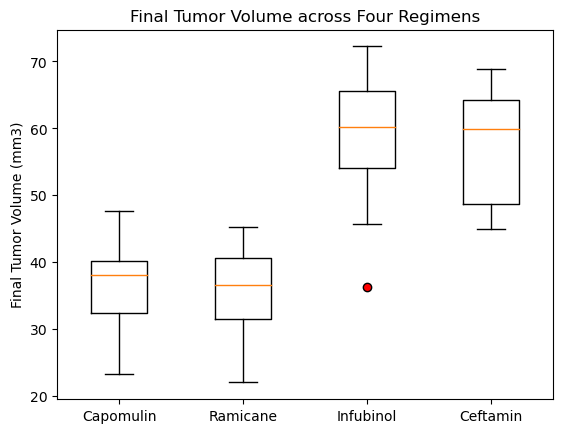

In [111]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
x=dict(markerfacecolor='r')

figl,axl=plt.subplots()

axl.boxplot(tumor_vol,flierprops=x)
axl.set_title("Final Tumor Volume across Four Regimens")
axl.set_ylabel("Final Tumor Volume (mm3)")
axl.set_xticklabels(treatments)
plt.show()


## Line and Scatter Plots

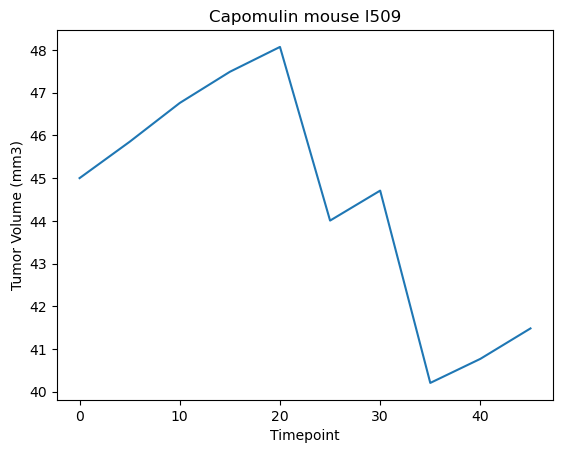

In [112]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
regimen_data=clean_df[clean_df["Drug Regimen"]=="Capomulin"]
data_by_mouse_id=regimen_data[regimen_data['Mouse ID']=='l509']
plt.plot(data_by_mouse_id['Timepoint'],data_by_mouse_id['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin mouse l509")
plt.show()




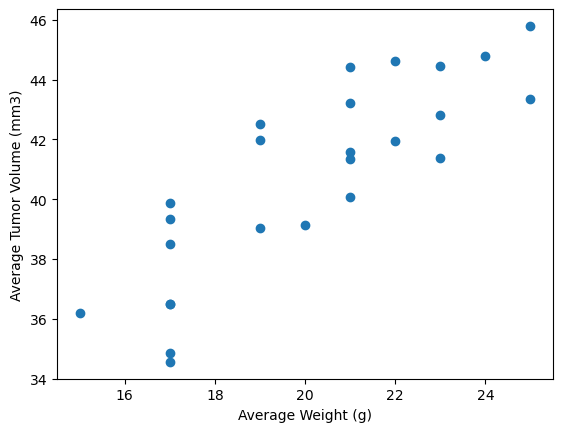

In [113]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
regimen_data = clean_df[clean_df['Drug Regimen']=='Capomulin']
averages=regimen_data.groupby(['Mouse ID']).mean()
plt.scatter(averages['Weight (g)'], averages ['Tumor Volume (mm3)'])
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()




## Correlation and Regression

The correlation between both factors is 0.84


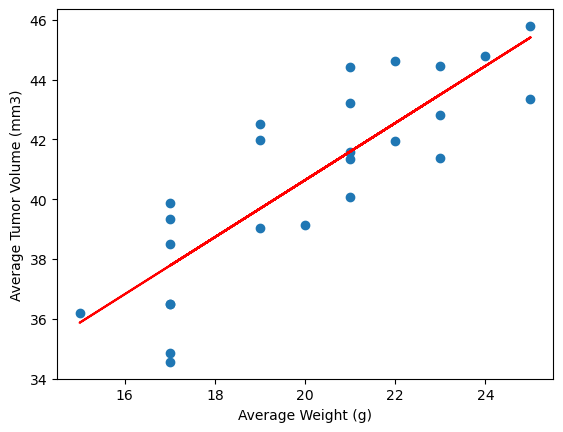

In [123]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(averages['Weight (g)'],averages ['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

regimen_data = clean_df[clean_df['Drug Regimen']=='Capomulin']
averages=regimen_data.groupby(['Mouse ID']).mean()

x_values = averages['Weight (g)']
y_values = averages ['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


